In [1]:
from keras.datasets import boston_housing

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


# Normalize the data

In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [4]:
from keras import models
from keras import layers


def build_model():
    model = models.Sequential()
    model.add(layers.Dense(units=64, activation="relu",
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(units=64, activation="relu"))
    model.add(layers.Dense(units=1))

    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    # "mse" == "mean square error"
    # "mae" == "mean absolute error" -- it's the absolute value of the difference between the prediction and the targets.
    return model

# K-fold validation

In [6]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

regr_model = build_model()

for i in range(k):
    print(f"processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    # prepare the validation data: data from partition #k
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0
    )

    # trains the model (in silent mode, verbose = 0)
    regr_model.fit(partial_train_data, partial_train_targets,
                   epochs=num_epochs, batch_size=1, verbose=0)
    # evaluate the model on the validation data
    val_mse, val_mae = regr_model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append((val_mse, val_mae))

processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [8]:
[sc[1] for sc in all_scores]

[2.2869064807891846,
 2.5438218116760254,
 2.0115363597869873,
 1.3570328950881958]

In [9]:
np.mean([sc[1] for sc in all_scores])

2.0498243868350983

In [5]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
regr_model = build_model()

for i in range(1, k):
    print(f"processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    # prepare the validation data: data from partition #k
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0
    )

    history = regr_model.fit(partial_train_data, partial_train_targets,
                             epochs=num_epochs, batch_size=1)
    all_mae_histories.append(history.history["mae"])

processing fold #0
Epoch 1/500
303/303 [==============================] - 3s 4ms/step - loss: 234.9640 - mae: 12.0819
Epoch 2/500
303/303 [==============================] - 1s 4ms/step - loss: 30.8830 - mae: 3.8567
Epoch 3/500
303/303 [==============================] - 2s 5ms/step - loss: 21.4128 - mae: 3.0868
Epoch 4/500
303/303 [==============================] - 2s 6ms/step - loss: 18.4415 - mae: 2.7901
Epoch 5/500
303/303 [==============================] - 2s 6ms/step - loss: 17.1260 - mae: 2.6279
Epoch 6/500
303/303 [==============================] - 2s 6ms/step - loss: 15.0596 - mae: 2.5643
Epoch 7/500
303/303 [==============================] - 2s 6ms/step - loss: 13.5451 - mae: 2.4236
Epoch 8/500
303/303 [==============================] - 2s 6ms/step - loss: 13.4652 - mae: 2.4668
Epoch 9/500
303/303 [==============================] - 2s 7ms/step - loss: 13.0043 - mae: 2.3909
Epoch 10/500
303/303 [==============================] - 2s 7ms/step - loss: 13.0941 - mae: 2.3545
Epoch 11

KeyError: 'val_mean_absolute_error'

In [8]:
all_mae_histories.append(history.history["mae"])

In [9]:
for i in range(1, k):
    print(f"processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    # prepare the validation data: data from partition #k
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0
    )

    history = regr_model.fit(partial_train_data, partial_train_targets,
                             epochs=num_epochs, batch_size=1)
    all_mae_histories.append(history.history["mae"])

processing fold #1
Epoch 1/500
303/303 [==============================] - 2s 6ms/step - loss: 4.0695 - mae: 1.2452
Epoch 2/500
303/303 [==============================] - 2s 5ms/step - loss: 3.4681 - mae: 1.1769
Epoch 3/500
303/303 [==============================] - 2s 5ms/step - loss: 3.0463 - mae: 1.1804
Epoch 4/500
303/303 [==============================] - 2s 6ms/step - loss: 2.5249 - mae: 1.1354
Epoch 5/500
303/303 [==============================] - 2s 6ms/step - loss: 2.4826 - mae: 1.1329
Epoch 6/500
303/303 [==============================] - 2s 5ms/step - loss: 2.5642 - mae: 1.1044
Epoch 7/500
303/303 [==============================] - 2s 6ms/step - loss: 2.2781 - mae: 1.0397
Epoch 8/500
303/303 [==============================] - 2s 6ms/step - loss: 2.2415 - mae: 1.1015
Epoch 9/500
303/303 [==============================] - 2s 6ms/step - loss: 2.1033 - mae: 1.0037
Epoch 10/500
303/303 [==============================] - 2s 6ms/step - loss: 1.9957 - mae: 1.0019
Epoch 11/500
303/303

In [10]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [11]:
all_mae_history = [x for mae_hist in all_mae_histories for x in mae_hist]

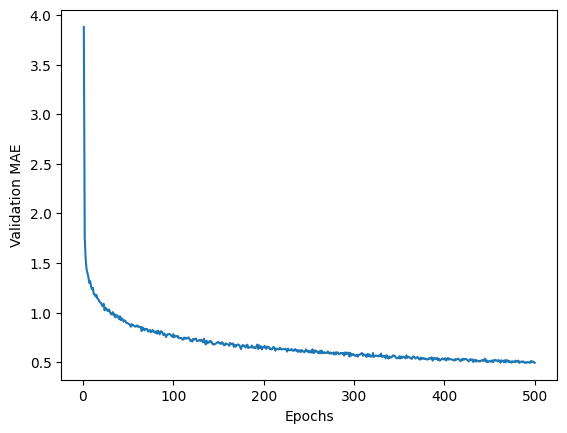

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

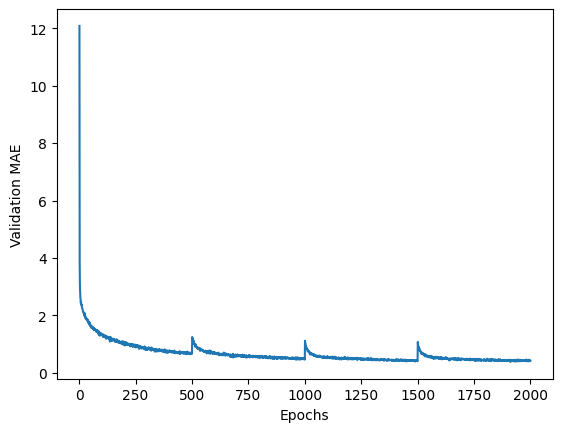

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(all_mae_history) + 1), all_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [14]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

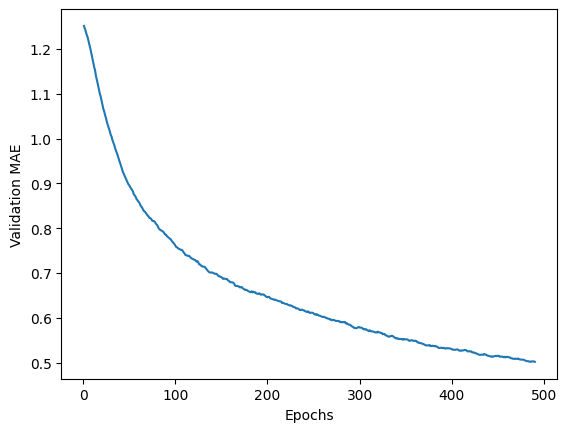

In [17]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

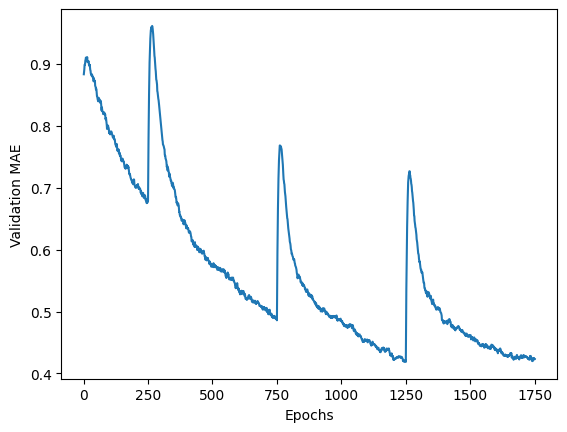

In [19]:
smooth_mae_history = smooth_curve(all_mae_history[250:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [20]:
test_mse_score, test_mae_score = regr_model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 15.0734 - mae: 2.7589


In [21]:
test_mse_score

15.073355674743652

In [22]:
test_mae_score

2.7589001655578613